### Clip AOCs to Joint Ventures

Jes Skillman / ArcPro / Python 3 / 11/22/2019
Purpose: Clip the AOCs to each Joint Venture polygon.

* AOC = HUC 12 (in the United States)
* Joint Ventures - from the Ducks Unlimited Portal
* Do not use the JV State Layer. Use the JV dissolved layer

In [63]:
import arcpy, os
from arcgis.gis import *
from IPython.display import display
import pandas as pd
import os
from zipfile import ZipFile

<Item title:"Watershed Boundary Dataset: HUC 12s" type:Feature Layer Collection owner:esri_livingatlas>
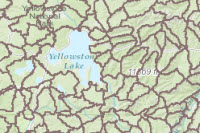

In [53]:
# Authenticate for Portal - sign in to portal on ArcPro First.
gis = GIS("pro")
# Find HUC12
HUC12_id = '0f76175ca3a4424a9ce2328b1daf931a'
HUC12 = gis.content.get(HUC12_id)
display(HUC12)
#savePath = r"C:\Users\jskillman\Ducks Unlimited Incorporated\GIS Department - ABDU DST and more!\GIS\Original_Data\AOCs"
#data_item.download(save_path = savePath)

In [50]:
# Authenticate for ArcOnline
gisOnline = GIS("https://duinc.maps.arcgis.com/home/", client_id = 'bYjQAo3TUIU9Koj5')
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://duinc.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=bYjQAo3TUIU9Koj5&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········
Successfully logged in as: jskillman


<Item title:"Joint Venture States Edit View" type:Feature Layer Collection owner:jskillman@ducks.org_duinc>
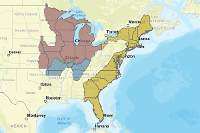

In [51]:
# Find Joint Ventures
jvID = '587c6e95f99d498e93492ec12681d18f'
jv = gisOnline.content.get(jvID)
display(jv)

In [ ]:
# HOW TO EXPORT THESE????????

### This process was run in ArcPro manually
1. Pulled HUC 12 layer from ArcOnline's Living Atlas on 11/21/2019
2. Select by Location - Select all HUC12 that intersect Joint Ventures
3. Extract to ~\GIS Department - ABDU DST and more!\GIS\Original_Data\AOCs\US_HUC12.gdb\HUC_12
4. Reproject to WKID 102003
5. Intersect HUC12 with JV Layer.

In [57]:
outCS = arcpy.SpatialReference(102003) 
outCS.PCSCode

102003

In [62]:
# set variables
inFC = HUC12
jvLayer = jv

savePath = r"C:\Users\jskillman\Ducks Unlimited Incorporated\GIS Department - ABDU DST and more!\GIS\Original_Data\AOCs"

outProj = os.path.join(savePath, "{}_{}".format(HUC12.name, outCS.PCSCode))
print(outProj)

outFC = os.path.join(savePath, "{}_{}_{}".format(HUC12.name, jv.name, outCS.PCSCode))
print(outFC)


C:\Users\jskillman\Ducks Unlimited Incorporated\GIS Department - ABDU DST and more!\GIS\Original_Data\AOCs\WatershedBoundaryDataset_HUC12_102003
C:\Users\jskillman\Ducks Unlimited Incorporated\GIS Department - ABDU DST and more!\GIS\Original_Data\AOCs\WatershedBoundaryDataset_HUC12_Joint_Venture_States_102003


In [ ]:
#from arcgis.features.analysis import *

# Select HUC12 within the Joint Venture Areas
#HUC12_in_JV = derive_new_locations(input_layers = [HUC12, jv],
#                                   expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"intersects"}], 
#                                   output_name = "HUC12_in_JV")

#display(HUC12_in_JV)

In [ ]:
try:
    # Make layer (or copy Features?)
    arcpy.MakeFeatureLayer_management(inFC, "lyr")
    
    # Select Layer by Location
    arcpy.SelectLayerByLocation_management("lyr", "INTERSECT", JV)
    
    # Reproject to Albers Equal Area
    outCS = arcpy.SpatialReference(102003)    
    arcpy.Project_management("huc_lyr", outProj, outCS)
    
    # Clip projected features to jv_layer
    arcpy.Intersect.analysis()



In [ ]:
def clip_lyr(in_features_gdb, out_features_gdb, jv_layer):
    arcpy.env.workspace = in_features_gdb
    try:
        for fc in arcpy.ListFeatureClasses():
            out_fc = os.path.join(out_features_gdb, fc + "_clipped")
            if arcpy.Exists(out_fc):
                print(fc + " already clipped.")
            else:
                arcpy.Clip_analysis(fc, jv_layer, out_fc)
                print(fc + " clipped to JV")
    except Exception:
        e = sys.exc_info()[1]
        print(e.args[0])